In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
games = pd.read_csv('vgsales.csv', sep=',')

In [2]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
g_train, g_test = train_test_split(games, test_size=0.3, random_state=42)
print(g_train.shape, g_test.shape)

(11618, 11) (4980, 11)


In [4]:
features= ['NA_Sales','EU_Sales','Other_Sales'] 
dt_regression = DecisionTreeRegressor(max_depth = 4) # Increase max_depth to see effect in the plot
dt_regression.fit(g_train[features], g_train['Global_Sales'])

DecisionTreeRegressor(max_depth=4)

In [5]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [6]:
predictionsOnTrainset = dt_regression.predict(g_train[features])
predictionsOnTestset = dt_regression.predict(g_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, g_train.Global_Sales)
rmseTest = calculate_rmse(predictionsOnTestset, g_test.Global_Sales)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.36693565378770404
RMSE on test set 0.8419295332025712


I did not expect this much of a difference. I would have assumed that the test set ratings are more close to the training set because predicting the global sales sounds like it wouldnt be too diffecult with the 2 features given. But it is still it is not a bad score. so i'm satisfied.

In [7]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

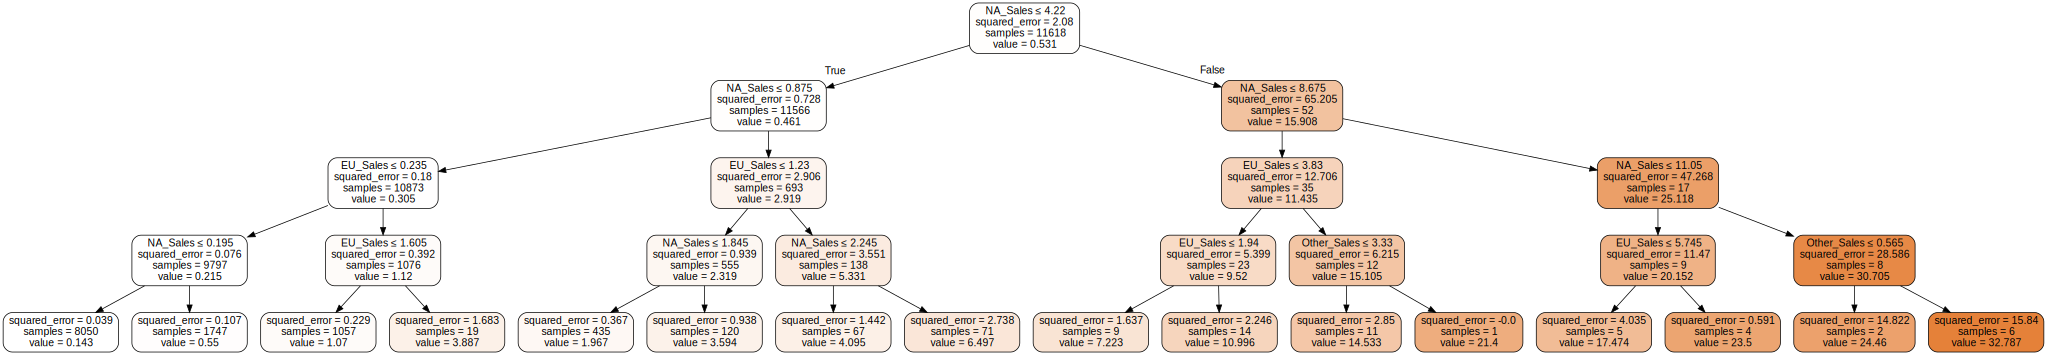

In [8]:
plot_tree_regression(dt_regression, features)

I understand the tree, it asks a question if NA_Sales is <= 4.22 then its true, and asks a new question which will me resulted into a true or false again, until it gives a esitmate of what the global sales could be. 